In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd
df=pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()  #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()  #check for null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()  #calculate statistical data on numerical column

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Outlier detection using IQR approach

In [8]:
a=['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']
for i in a:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
    print("{} lower threshold :{} and upper threshold :{}".format(i,lower_threshold, upper_threshold))

step lower threshold :-112.5 and upper threshold :603.5
amount lower threshold :-279608.29125 and upper threshold :501719.33875
oldbalanceOrg lower threshold :-160972.7625 and upper threshold :268287.9375
newbalanceOrig lower threshold :-216387.615 and upper threshold :360646.025
oldbalanceDest lower threshold :-1414555.06125 and upper threshold :2357591.76875
newbalanceDest lower threshold :-1667863.875 and upper threshold :2779773.125
isFraud lower threshold :0.0 and upper threshold :0.0
isFlaggedFraud lower threshold :0.0 and upper threshold :0.0


### Conclusion:

- step: 1 means first hour (12 AM) of the 1st day of the month, 744 means last hour(11 PM) of the 31st day. All values in this range, so no outlier.
- Other five columns contains about amount,transactions details so it could be possible there exist such transaction which involve huge amount.
- isFraud: which is 1(Fraud) or 0(not Fraud) 
- isFlaggedFraud: which is 1(attempt to transfer 200.000) or 0(if no such attempts)

In [9]:
df['isFraud'].unique(),df['isFlaggedFraud'].unique()

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

In [10]:
df.duplicated().sum()  #number of duplicated rows present

0

No duplicates Present

In [11]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

### Data Engineering

In [12]:
df['SenderType']=df.nameOrig.apply(lambda x:x[0])

In [13]:
df['SenderType'].value_counts()

C    6362620
Name: SenderType, dtype: int64

In [14]:
df['RecieverType']=df.nameDest.apply(lambda x:x[0])

In [15]:
df['RecieverType'].value_counts()

C    4211125
M    2151495
Name: RecieverType, dtype: int64

Conclusion: 
- There is no need of Finding out Sender datatype because it only contains Customer type
- But in Reciever Type we can see there are presence of both Customer and Merchants

In [16]:
df.drop(columns=['SenderType'],inplace=True)

In [17]:
df[(df['RecieverType']=='M')&((df['oldbalanceDest']!=0)|(df['newbalanceDest']!=0))].shape[0]

0

Conclusion:
- There is no Reciever who is Merchant and have details about Transaction

## EDA

In [21]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'RecieverType'],
      dtype='object')

#### step

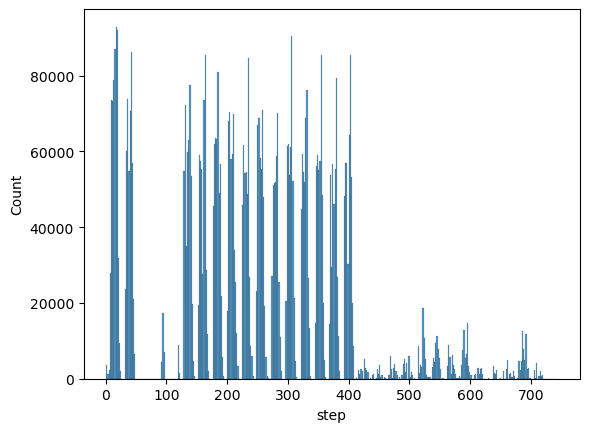

In [22]:
sns.histplot(df,x="step");
plt.show()

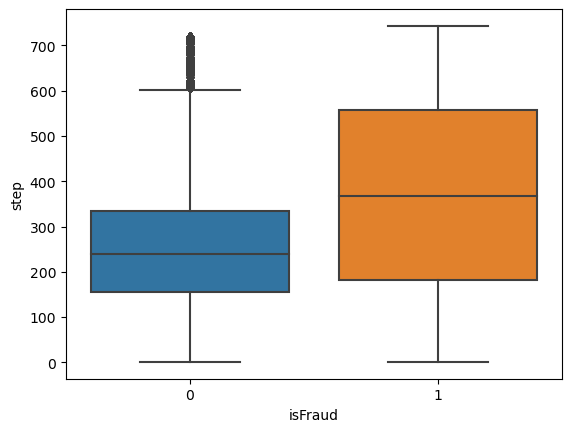

In [23]:
sns.boxplot(data=df,x='isFraud',y='step');
#fig=px.box(df,x='isFraud',y='step');
#fig.show()

Conclusion: 
- From Histogram we can say that Transaction Peaking in First two days(48 hours) and between 4th(120) and 16th(400) day of given month.
- From Box plot we conclude that transaction which occur after 13th day(roughly 330 hour or step)of the month are Fraud Transaction

#### type

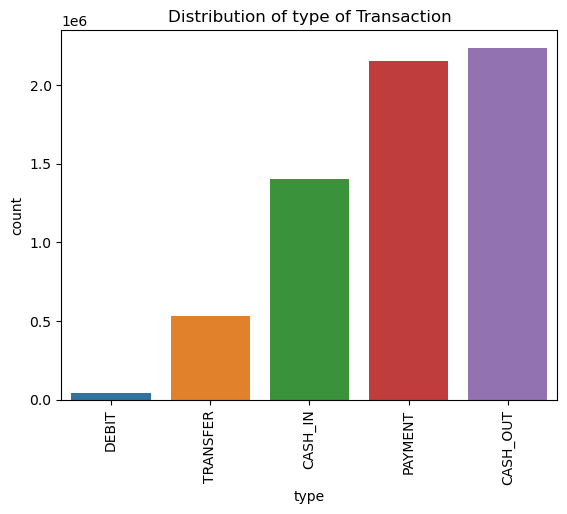

In [21]:
df01=df.groupby(["type"])["type"].count().to_frame()
df01.rename(columns={"type":'count'},inplace=True)
df01=df01.sort_values(by="count").reset_index()
ax=sns.barplot(data=df01,x="type",y="count")
ax.tick_params(axis='x',rotation=90)
ax.set_title('Distribution of type of Transaction');

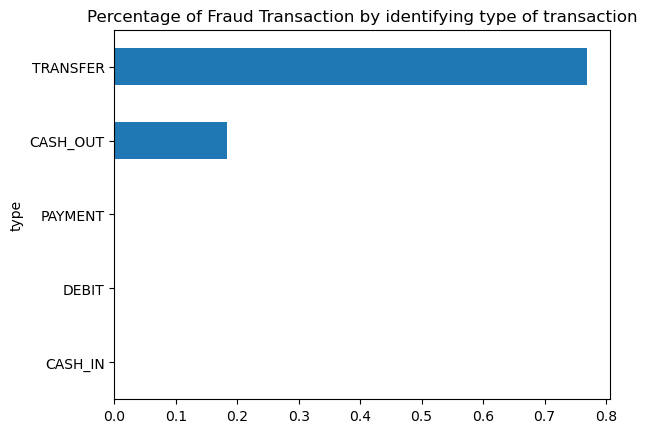

In [88]:
(df.groupby("type")['isFraud'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of Fraud Transaction by identifying type of transaction');

Conclusion:
- From first plot we see that Maximum transaction has been CASH-OUT,Payment.
- From Second plot we conclude that Maximum fraud transaction(80%) are of type TRANSFER.
- No Fraud Transaction occur using PAYMENT,DEBIT,CASH_IN transaction.

#### isFlagged

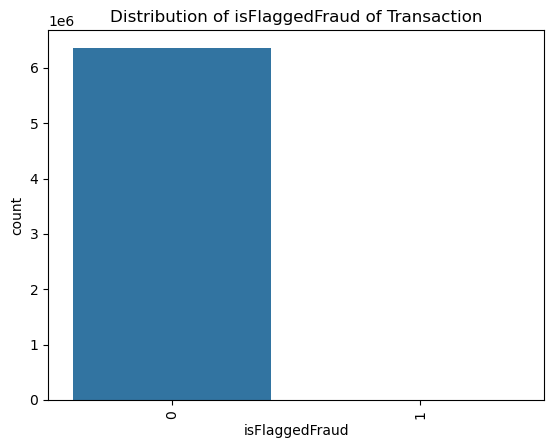

In [23]:
df01=df.groupby(["isFlaggedFraud"])["isFlaggedFraud"].count().to_frame()
df01.rename(columns={"isFlaggedFraud":'count'},inplace=True)
df01=df01.sort_values(by="count").reset_index()
ax=sns.barplot(data=df01,x="isFlaggedFraud",y="count")
ax.tick_params(axis='x',rotation=90)
ax.set_title('Distribution of isFlaggedFraud of Transaction');

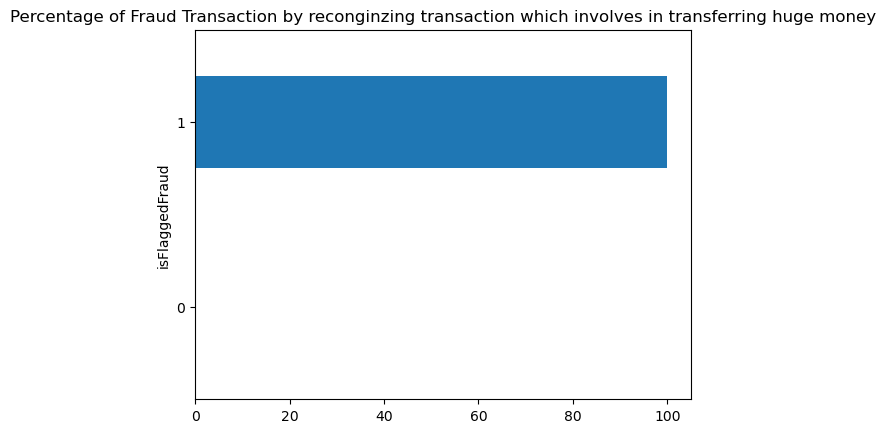

In [89]:
(df.groupby("isFlaggedFraud")['isFraud'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of Fraud Transaction by reconginzing transaction which involves in transferring huge money');

Conclusion:
- From these two plots we can conclude that all trancation of abouve 200,000 are Fraud Transaction

#### Reciever Type

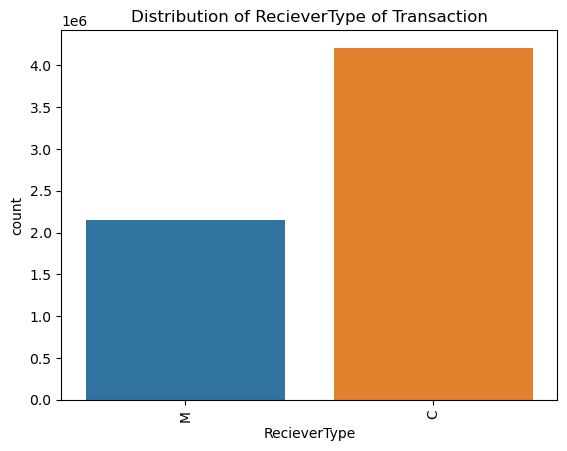

In [25]:
df01=df.groupby(["RecieverType"])["RecieverType"].count().to_frame()
df01.rename(columns={"RecieverType":'count'},inplace=True)
df01=df01.sort_values(by="count").reset_index()
ax=sns.barplot(data=df01,x="RecieverType",y="count")
ax.tick_params(axis='x',rotation=90)
ax.set_title('Distribution of RecieverType of Transaction');

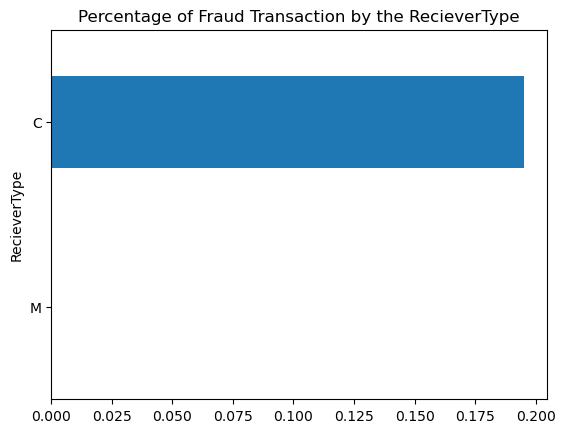

In [90]:
(df.groupby("RecieverType")['isFraud'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of Fraud Transaction by the RecieverType');

Conclusion:
- From 2nd plot we can see that the fraud transaction occur only when Reciever is Customer(Normal People).
- Merchants don't get involve in Fraud transaction

### Data Encoding

In [91]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,RecieverType
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0,M
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0,M
2,1,TRANSFER,181.00000,C1305486145,181.00000,0.00000,C553264065,0.00000,0.00000,1,0,C
3,1,CASH_OUT,181.00000,C840083671,181.00000,0.00000,C38997010,21182.00000,0.00000,1,0,C
4,1,PAYMENT,11668.14000,C2048537720,41554.00000,29885.86000,M1230701703,0.00000,0.00000,0,0,M


In [92]:
new_df.drop(columns=['nameOrig','nameDest'],inplace=True)

In [93]:
new_df['type']=new_df['type'].map({'TRANSFER':1,'CASH_OUT':2,'PAYMENT':3,'DEBIT':3,'CASH_IN':3})
new_df['RecieverType']=new_df['RecieverType'].map({'M':1,'C':2})

### MULTICOLINEARITY

<AxesSubplot:>

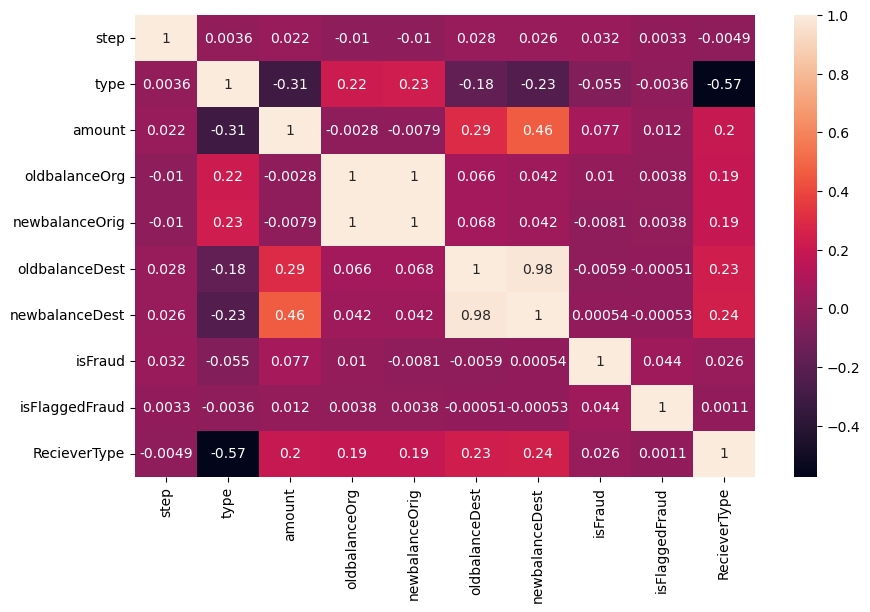

In [94]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [42]:
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,RecieverType
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0,1
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0,1
2,1,1,181.00,181.00,0.00,0.00,0.00,1,0,2
3,1,2,181.00,181.00,0.00,21182.00,0.00,1,0,2
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0,1


In [43]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
 9   RecieverType    int64  
dtypes: float64(5), int64(5)
memory usage: 485.4 MB


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,3.83
1,type,6.20
2,amount,4.18
3,oldbalanceOrg,554.61
4,newbalanceOrig,558.56
5,oldbalanceDest,73.34
6,newbalanceDest,84.89
7,isFraud,1.19
8,isFlaggedFraud,1.00
9,RecieverType,6.31


Conclusion:
- We can see that 'oldbalanceOrg' and 'oldbalanceOrg' have high value of VIF, so they are COLINEAR.
- Also 'oldbalanceDest' and 'newbalanceDest' have high value of VIF, so they are COLINEAR.
So we Combine these pair of values

In [45]:
new_df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',
       'RecieverType'],
      dtype='object')

In [46]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,step,3.80
1,type,6.08
2,amount,4.05
3,isFraud,1.18
4,isFlaggedFraud,1.00
5,RecieverType,6.04
6,Actual_amount_orig,1.27
7,Actual_amount_dest,3.78


## MODEL BUILDING

### Logistic Regression

In [48]:
## Data Splitting

from sklearn.model_selection import train_test_split

X=new_df.drop(columns=['isFraud']).values
y=new_df['isFraud'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.unique(y_train,return_counts=True))

(4453834, 7) (1908786, 7) (4453834,) (1908786,)
(array([0, 1], dtype=int64), array([4448085,    5749], dtype=int64))


In [49]:
from sklearn.preprocessing import StandardScaler ## standrard scaling 

scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [50]:
from sklearn.linear_model import LogisticRegression #LR model 
logistic_regression= LogisticRegression() 
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

In [51]:
y_pred=logistic_regression.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
from sklearn.metrics import roc_auc_score

lg_roc=roc_auc_score(y_test,logistic_regression.predict_proba(X_test_scaled)[:,1])
print(lg_roc)

0.9922365097520285


In [53]:
new_df.head()

,step,type,amount,isFraud,isFlaggedFraud,RecieverType,Actual_amount_orig,Actual_amount_dest
0,1,3,9839.64,0,0,1,9839.64,0.00
1,1,3,1864.28,0,0,1,1864.28,0.00
2,1,1,181.00,1,0,2,181.00,0.00
3,1,2,181.00,1,0,2,181.00,21182.00
4,1,3,11668.14,0,0,1,11668.14,0.00


In [54]:
new_df.columns

Index(['step', 'type', 'amount', 'isFraud', 'isFlaggedFraud', 'RecieverType',
       'Actual_amount_orig', 'Actual_amount_dest'],
      dtype='object')

In [55]:
coef=pd.DataFrame(logistic_regression.coef_.reshape(-1),[['step', 'type', 'amount', 'isFlaggedFraud', 'RecieverType',
       'Actual_amount_orig', 'Actual_amount_dest']],["Coefficients"])
coef

,Coefficients
step,0.74
type,-1.12
amount,-23.01
isFlaggedFraud,0.65
RecieverType,3.00
Actual_amount_orig,7.31
Actual_amount_dest,4.00


In [56]:
coef.reset_index(inplace=True)
coef["Coefficients"]=coef["Coefficients"].apply(lambda x:abs(x))
coef["Importnace"]=coef["Coefficients"].apply(lambda x:x/coef["Coefficients"].sum())

In [57]:
coef

,level_0,Coefficients,Importnace
0,step,0.74,0.02
1,type,1.12,0.03
2,amount,23.01,0.58
3,isFlaggedFraud,0.65,0.02
4,RecieverType,3.00,0.08
5,Actual_amount_orig,7.31,0.18
6,Actual_amount_dest,4.00,0.10


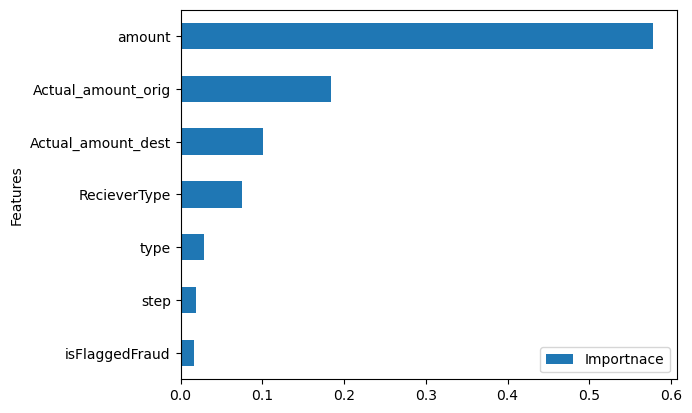

In [58]:
coef=coef.rename(columns={'level_0':'Features'})
coef.sort_values("Importnace",ascending=True,inplace=True)
coef.plot(kind='barh',y="Importnace",x="Features");

Conclusion:
- From Logistic Regression we can say that Amount is very Important Feature in Predicting Fraud Transaction
- Frauds always tend to loot as more money as possible. So its make sense amount is very important feature in this.
- So Bank has to make sure there must be strong security while withdrawing large money whether its online,ATM by installing steps like 2 way verification,OTP ,etc.

### Random Forest

In [79]:
X=new_df.drop(columns=['isFraud'])
y=new_df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
#print(rf.score(X_test,y_test))
print(accuracy_score(y_pred,y_test))

0.9988762490923551


In [81]:
confusion_matrix(y_test,y_pred)

array([[1906322,       0],
       [   2145,     319]], dtype=int64)

In [82]:
rf_roc=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
print(rf_roc)

0.9330378024546608


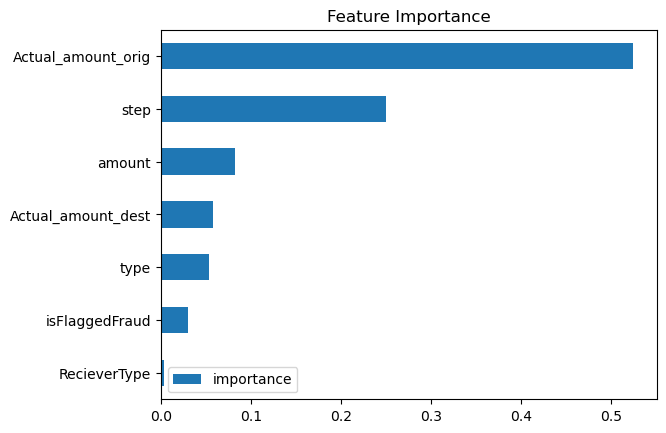

In [83]:
fi = pd.DataFrame(data=rf.feature_importances_,
             index=rf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- From Random Forest Model we can say that Actual_Amount sent by sender is very Important Feature in Predicting Fraud Transaction.
-the time of the transaction also very important feature.

### XGBoost

In [66]:
X=new_df.drop(columns=['isFraud'])
y=new_df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

In [69]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test)

0.9997155259940087

In [70]:
y_pred = model.predict(X_test_scaled)

In [72]:
from sklearn.metrics import roc_auc_score
xg_roc=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print(xg_roc)

0.9983249539422122


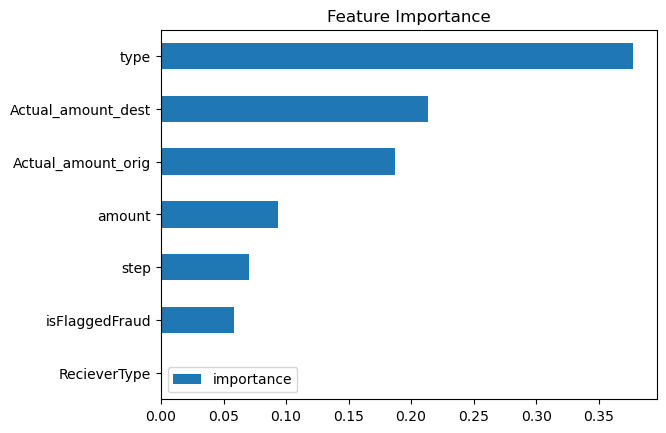

In [73]:
fi = pd.DataFrame(data=model.feature_importances_,
             index=model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- From XGBoost Model we can say that type of Transaction is very Important Feature in Predicting Fraud Transaction.
- Type of transaction plays very important role, as we seen in EDA, CASH_OUT transaction mostly involves transferring of illegal money which No Bank or Any Government Institute can trace.

### Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train ,y_train) 
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics import roc_auc_score
dt_roc=roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])
print(dt_roc)

0.892526225613661


In [76]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[1905834,     488],
       [    529,    1935]], dtype=int64)

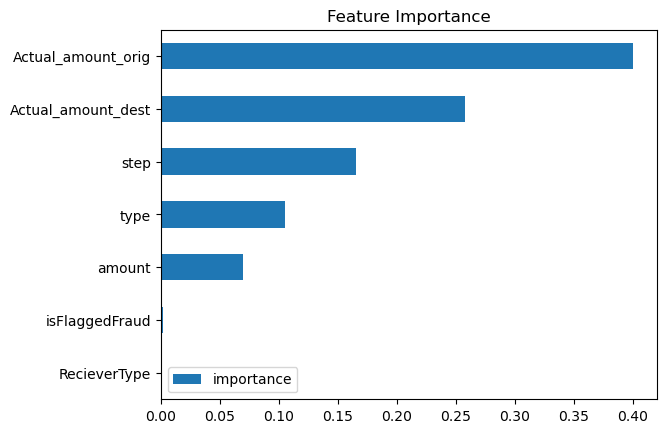

In [77]:
fi = pd.DataFrame(data=dt.feature_importances_,
             index=dt.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- From Decision Tree Model we can say that Actual_Amount sent by sender is very Important Feature in Predicting Fraud Transaction.
-From DT model we can say that Both Sender and Receiver involve in Fraud transaction, and it happens in mostly second half of the month(as step is 3rd important feature).

In [87]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

data={'ROC_SCORE':[lg_roc,dt_roc,rf_roc,xg_roc]}
label=['Logistic Regression', 'Decision Tree', 'Random Forest',  'XGBoost']
Final=pd.DataFrame(data,index=label)
Final

,ROC_SCORE
Logistic Regression,0.99224
Decision Tree,0.89253
Random Forest,0.93304
XGBoost,0.99832


Summary:
- We can say that XGBoost is turned out to be very important Feature in Predicting Fraud Transaction

What kind of prevention should be adopted while company update its infrastructure?

- Use apps which authorized by the Bank only.
- Use website which is secure. We can identify secure website if it starts with 'https'
- Don't use Public Wifi.
- Keep update Mobile and PC to latest security patch.
- Don't get fooled by spam calls,SMS,E-mails.
- If you keep getting abnormal message regarding OTP or any other things related to your bank account, contact your bank immidiately.

Assuming these actions have been implemented, how would you determine if they work?

- By setting two way verification or any other strong security barrier.
- Keep track account activity.